## Supervised Learning

- Instructor: Aldo Alducin
- Presenta: Juliho Castillo Colmenares



<p><img src="https://preview.redd.it/rfgtsej8fhv71.jpg?auto=webp&s=99a5d000ff2baaac79a8d15c7135c3677f105159" width="1000"></p>

## Exploratory Data Analysis
<p>Vamos a trabajar con el conjunto de datos de <code>Heart Attack</code>, el objetivo es predecir bajo que escenario es más probable que un paciente pueda tener un ataque al corazón  Un experto en medicina cardiovasuclar puede predecir esto sin hacer uso de <i>Machine Learning</i>, pero probablemente no instantáneamente, ¡y ciertamente no si estamos tratando con cientos o miles de muestras!.
    
A continuación una breve explicación de las variables del dataset:
    
- <b>age:</b> Age of the patient
- <b>sex:</b> Sex of the patient
- <b>cp:</b> Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- <b>trtbps:</b> Resting blood pressure (in mm Hg)
- <b>chol:</b> Cholestoral in mg/dl fetched via BMI sensor
- <b>fbs:</b> (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- <b>restecg:</b> Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- <b>thalachh:</b> Maximum heart rate achieved
- <b>oldpeak:</b> Previous peak
- <b>slp:</b> Slope
- <b>caa:</b> Number of major vessels
- <b>thall:</b> Thalium Stress Test result ~ (0,3)
- <b>exng:</b> Exercise induced angina ~ 1 = Yes, 0 = No
- <b>output:</b>  Target variable</p>

In [91]:
# Archivo Heart Attack.csv - ¿Cuales son los factores que pueden incrementar o disminuir la probabilidad de un ataque al corazón?

import pandas as pd

df = pd.read_csv('Heart Attack.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [92]:
# There are not null values in the dataset
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.pipeline import Pipeline

def transform_data(df):
    # Definir las variables categóricas y numéricas
    categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'slp', 'caa', 'thall', 'exng']
    numerical_vars = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

    # Crear el transformador de columnas para las variables categóricas
    categorical_transformers = ('categorical', OneHotEncoder(drop='first'), categorical_vars)

    # Crear el transformador de columnas para las variables numéricas
    numerical_transformers = ('numerical', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'), numerical_vars)

    # Combinar ambos transformadores en un ColumnTransformer
    column_transformer = ColumnTransformer(transformers=[categorical_transformers, numerical_transformers], remainder='passthrough')

    # Crear el pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', column_transformer)
    ])

    # Ajustar y transformar los datos
    df_transformed = pipeline.fit_transform(df)

    # Obtener nombres de las columnas transformadas
    categorical_feature_names = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_vars)
    numerical_feature_names = [f'bucket_{var}' for var in numerical_vars]
    other_feature_names = [col for col in df.columns if col not in categorical_vars + numerical_vars]

    # Combinar todos los nombres de las columnas
    all_feature_names = list(categorical_feature_names) + numerical_feature_names + other_feature_names

    # Convertir el resultado a un DataFrame
    df_transformed = pd.DataFrame(df_transformed, columns=all_feature_names)

    return df_transformed

# Ejemplo de uso
df = transform_data(df)

   sex_1  cp_1  cp_2  cp_3  fbs_1  restecg_1  restecg_2  slp_1  slp_2  caa_1  \
0    1.0   0.0   0.0   1.0    1.0        0.0        0.0    0.0    0.0    0.0   
1    1.0   0.0   1.0   0.0    0.0        1.0        0.0    0.0    0.0    0.0   
2    0.0   1.0   0.0   0.0    0.0        0.0        0.0    0.0    1.0    0.0   
3    1.0   1.0   0.0   0.0    0.0        1.0        0.0    0.0    1.0    0.0   
4    0.0   0.0   0.0   0.0    0.0        1.0        0.0    0.0    1.0    0.0   

   ...  thall_1  thall_2  thall_3  exng_1  bucket_age  bucket_trtbps  \
0  ...      1.0      0.0      0.0     0.0         3.0            2.0   
1  ...      0.0      1.0      0.0     0.0         0.0            1.0   
2  ...      0.0      1.0      0.0     0.0         1.0            1.0   
3  ...      0.0      1.0      0.0     0.0         2.0            1.0   
4  ...      0.0      1.0      0.0     1.0         2.0            1.0   

   bucket_chol  bucket_thalachh  bucket_oldpeak  output  
0          1.0              

In [94]:
df.head()

,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,caa_1,...,thall_1,thall_2,thall_3,exng_1,bucket_age,bucket_trtbps,bucket_chol,bucket_thalachh,bucket_oldpeak,output
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,3.0,2.0,1.0,3.0,1.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,2.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,2.0,1.0,1.0,4.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,2.0,1.0,2.0,3.0,0.0,1.0


In [95]:
df['output'].value_counts()

output
1.0    165
0.0    138
Name: count, dtype: int64

In [96]:
# Compute the correlation matrix
correlation_matrix = df.corr()

In [97]:

# Extract the correlation values for the 'output' variable
output_correlation = correlation_matrix['output']

# Sort the correlation values in descending order
sorted_correlation = output_correlation.sort_values(ascending=False)

# Display the top correlated variables
print(sorted_correlation)

output             1.000000
thall_2            0.527334
slp_2              0.394066
bucket_thalachh    0.389400
cp_2               0.316742
cp_1               0.245879
restecg_1          0.175322
cp_3               0.086957
caa_4              0.066441
fbs_1             -0.028046
bucket_chol       -0.051922
restecg_2         -0.068410
thall_1           -0.106589
bucket_trtbps     -0.122897
caa_3             -0.210615
bucket_age        -0.221598
caa_1             -0.232412
caa_2             -0.273998
sex_1             -0.280937
slp_1             -0.362053
bucket_oldpeak    -0.383148
exng_1            -0.436757
thall_3           -0.486112
Name: output, dtype: float64


Fue imposible instalar la librería anterior debido a este error:
```
Failed to build levenshtein regex
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (levenshtein, regex)
```

## k-Nearest Neighbors
<p>Habiendo hecho un Análisis Exploratorio de los factores que pueden o no tener más posibilidad de un ataque al corazón, es hora de crear tu primer clasificador!!! usando el algoritmo de k-NN.
    
<b>Nota</b>: es importante garantizar que los datos esten en el formato requerido por la librería de <code>scikit-learn</code>. La información debe estar en una matriz en la que cada columna sea una variable y cada fila una observación diferente, en este caso, el registro de análisis clinico por paciente. Y la variable objetivo debe ser una sola columna con el mismo número de observaciones.</p>

In [98]:
# Importa la librería para un clasificador k-NN de sklearn
from sklearn.neighbors import KNeighborsClassifier

# Crea dos arreglos "X", "y" que contengan los valores de las variables independientes y la variable objetivo
X = df.drop('output', axis=1)
y = df['output']

# Crea un clasificador k-NN con 6 vecinos
model = KNeighborsClassifier(n_neighbors=6)

# Ajusta el clasificador a las variables
model.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

## Predicción
<p>Una vez que entrenamos al clasificador k-NN, ahora lo podemos usar para predecir un nuevo registro. Para este caso,  no hay datos sin clasificar disponibles ya que todos se usaron para entrenar al modelo. Para poder calcular una predicción, vamos a usar el método <code>.predict()</code> pero, para esto vamos a simular una observación completamente nueva</p>

In [99]:
# Crea un arreglo simulando una observación
X_new = X.median().values.reshape(1, -1)

# Predice la clasificación para el arreglo que creaste
y_new_pred = model.predict(X_new)
print("Prediction: {}".format(y_new_pred))

Prediction: [1.]


## Reconocimiento de digitos
<p>Hasta ahora, solo hemos realizado una clasificación binaria, ya que la variable objetivo tenía dos resultados posibles. En los siguientes ejercicios, trabajarás con el conjunto de datos de reconocimiento de dígitos MNIST, que tiene 10 clases, ¡los dígitos del 0 al 9! Una versión reducida del conjunto de datos <a href="http://yann.lecun.com/exdb/mnist/">MNIST</a> es uno de los conjuntos de datos incluidos en <code>scikit-learn</code>

Cada muestra de este conjunto de datos es una imagen de 28x28 que representa un dígito escrito a mano. Cada píxel está representado por un número entero en el rango de 1 a 784, lo que indica niveles variables de negro.

<p><img src="https://miro.medium.com/max/1400/1*hVdoiW35FXUE-fZ0HI30Tw.jpeg" width="350"></p>

In [100]:
# Importa el archivo de MNIST
digits = pd.read_csv('mnist.csv')


In [101]:

digits.columns


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [102]:
# Crea una variable 'cols' para hacer referencia a todas las columnas que contienen la palabra 'pixel'
cols = [col for col in digits.columns if 'pixel' in col]

In [103]:
# Vamos a imprimir un digito
i = 0
print("El número es:", df.loc[i, 'output'])	


El número es: 1.0


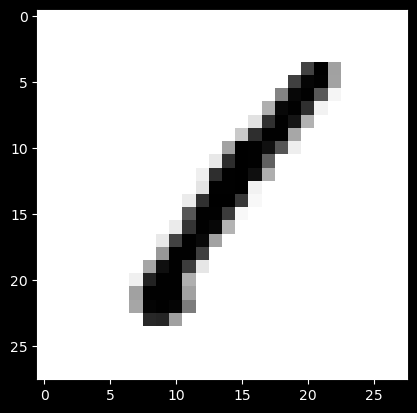

In [104]:
import matplotlib.pyplot as plt

# Mostrar la imagen
plt.imshow(digits.loc[i, cols].values.reshape((28, 28)).astype(float), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## Train/Test
<p>Una de las principales diferencias entre la Estadística Clasica y el <i>Machine Learning</i> es la división del conjunto de datos en conjuntos de entrenamiento y prueba, con el objetivo de medir y cuantificar la precisión y el nivel de error en los datos que de alguna manera el modelo <i>"No ha visto"</i>. A continuación crearemos nuestros conjuntos de entrenamiento y prueba con el método <code>train_test_split</code> y mediremos cual es el nivel de precisión de nuestro modelo. El objetivo es <b>predecir cual es el digito dada una imagen</b>!!!. Para lo cual entrenaremos un clasificador <i>k-NN</i> a los datos de entrenamiento y luego calcularemos su precisión usando el método <code>accuracy_score()</code> en los datos de prueba ¿Como crees que en un modelo de Clasificación se calcule su precisión?. Parece bastante dificil, pero no lo es ;)</p>

In [105]:
# Importa la librería para entrenamiento y prueba de datos y la librería para calcular la precisión
from sklearn.model_selection import train_test_split

In [106]:
# Crea los arreglos para las variables independientes y la variable objetivo
from sklearn.metrics import accuracy_score

X = digits.drop('label', axis=1)
y = digits['label']

# Divide los arreglos anteriores en conjuntos de training y test en una proporcion del 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=2024)

# Convertir X_train y X_test a arrays de NumPy y asegurarse de que sean C-contiguos
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)


# Instancia un clasificador k-NN con 14 vecinos
knn = KNeighborsClassifier(n_neighbors=14)

# Ajusta (Entrenamiento) el clasificador en el conjunto de entrenamiento
knn.fit(X_train, y_train)

# Calcular las predicciones sobre el conjunto de prueba
y_pred = knn.predict(X_test)


In [107]:
y_test.shape

(8400,)

In [108]:

# Verificar la precisión del modelo 
print(accuracy_score(y_test, y_pred))

0.9570238095238095


## Reconocimiento de tu imagen
<p>Con todo lo anterior, podemos hacer el reconocimiento de cualquier digito que dibujes, ¿Estás list@?</p>

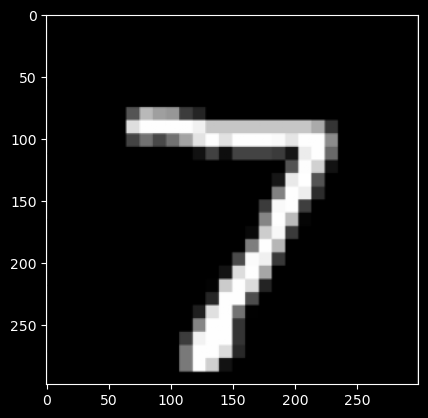

In [109]:
# Vamos a visualizar la imagen de un número que vas a crear en tu computador con la aplicación de paint, ésta imagen debe de tener un fondo negro y ser pintada en blanco, encontrarás un ejemplo en el repositorio
path = 'sample_image-300x298.png'
image = plt.imread(path) # Coloca aquí la ruta de la imagen que hayas creado en formato jpg o png
plt.imshow(image)

In [110]:
# Con esta libreria transformaremos la imagen creada a un formato de 28x28 pixeles
from PIL import Image
import numpy as np 
pil = Image.open(path)
image_resize = pil.resize((28, 28))

# Vamos transformar la nueva imagen en un array donde se almacenara la información de los pixeles
pixels = np.asarray(image_resize)

In [111]:
# Necesitamos hacer algunas configuraciones a la imagen debido al formato de datos que esta alimentando al modelo y a la configuración de sklearn
arr = pixels.transpose(2, 0, 1).reshape(-1, pixels.shape[1])[0:28]

image_final = arr.ravel().reshape(1, -1)

In [112]:
# Calcula la predicción del modelo con el número que creaste, ¿Fue la clasificación correcta? :O
prediction = knn.predict(image_final)
prediction 


array([7], dtype=int64)

El número es: [7]


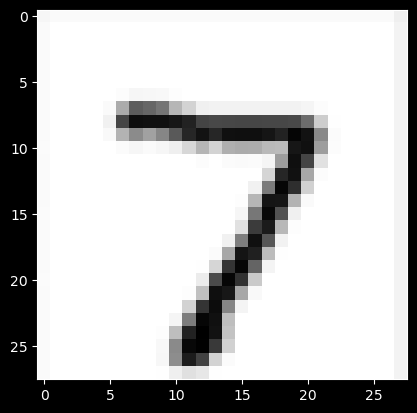

In [113]:
print("El número es:", prediction)
plt.imshow(arr, cmap=plt.cm.gray_r, interpolation='nearest')

## Overfit and Underfit
<p>¿Cual es mi numero ideal para elegir el parametro <i>k</i>? Vamos a calcular los valores de precisión para los conjuntos e entrenamiento y prueba para una rango de valores k. Al observar cómo difieren estos valores podremos observar cual es el mejor parametro sin caer en un <i>Overfit</i> o un <i>Underfit</i>.</p>

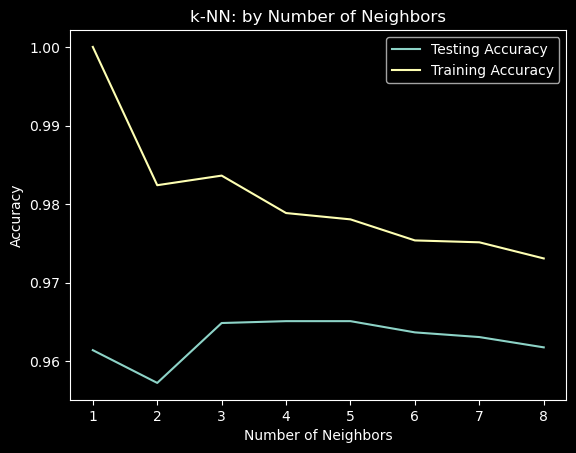

In [114]:
# Coniguración de arreglos iniciales
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop para diferentes valores de k
for i, k in enumerate(neighbors):
    # Clasificador k-NN para el parametro k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Ajuste del clasificador al dataset de entrenamiento
    knn.fit(X_train, y_train)
    
    # Calculo de precision sobre el dataset de entrenamiento
    train_accuracy[i] = knn.score(X_train, y_train)

    # Calculo de precision sobre el dataset de prueba
    test_accuracy[i] = knn.score(X_test, y_test)

# Grafico para encontrar un valor optimo de k
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.title('k-NN: by Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Regresión Logística
<p>Haz la predicción de tu imagen, pero esta vez por medio de una Regresión Logística, ¿Cuál de los dos modelos te da mejores resultados?</p>

In [117]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Split the data into training and testing sets
X = df.drop('output', axis=1)
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for KNN and Logistic Regression
param_grid = {
    'knn': {
        'n_neighbors': range(1, 15),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'logreg': {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [100, 200, 300]
    }
}

# Create the models
knn = KNeighborsClassifier()
logreg = LogisticRegression()

# Set up GridSearchCV for both models
grid_search_knn = GridSearchCV(knn, param_grid['knn'], cv=5, scoring='accuracy')
grid_search_logreg = GridSearchCV(logreg, param_grid['logreg'], cv=5, scoring='accuracy')

# Fit the models
grid_search_knn.fit(X_train, y_train)
grid_search_logreg.fit(X_train, y_train)

# Evaluate the results
best_knn = grid_search_knn.best_estimator_
best_logreg = grid_search_logreg.best_estimator_

print("Best KNN parameters:", grid_search_knn.best_params_)
print("Best KNN accuracy:", grid_search_knn.best_score_)

print("Best Logistic Regression parameters:", grid_search_logreg.best_params_)
print("Best Logistic Regression accuracy:", grid_search_logreg.best_score_)

# Test the best models on the test set
y_pred_knn = best_knn.predict(X_test)
y_pred_logreg = best_logreg.predict(X_test)

print("Test accuracy for KNN:", accuracy_score(y_test, y_pred_knn))
print("Test accuracy for Logistic Regression:", accuracy_score(y_test, y_pred_logreg))

Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}
Best KNN accuracy: 0.8224489795918366
Best Logistic Regression parameters: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Best Logistic Regression accuracy: 0.8302721088435374
Test accuracy for KNN: 0.8524590163934426
Test accuracy for Logistic Regression: 0.8688524590163934


Al comparar los valores en de la precisión de los modelos, podemos observar que el modelo de Regresión Logística tiene un mejor desempeño que el modelo de k-NN.